Sections:


1. <a href="#sec1"> Imports </a>
2. <a href="#sec2"> Load data </a>
3. <a href="#sec3"> Visualizing image data </a>
    * <a href="#sec30"> data reshaping </a>
    * <a href="#sec31"> visualization </a>
4. <a href="#sec4"> Pre-processing </a>
    * <a href="#sec41"> labels </a>
    * <a href="#sec42"> data normalization </a>
    * <a href="#sec43"> data split </a>
5. <a href="#sec5"> Define and train model </a>
6. <a href="#sec6"> Evaluate model </a>
7. <a href="#sec7"> Predict on test data </a>
    * <a href="#sec71"> generate submission </a>
8. <a href="#sec8"> Potential next steps </a>


<a id="sec1"></a>
## 1. Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<a id="sec2"></a>
## 2. Load data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train_temp = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])

x_test = np.array(df_test)

<a id="sec3"></a>
## 3. Visualizing image data

<a id="sec30"></a>
### data reshaping

In [7]:
N_train_samples = x_train_temp.shape[0]
x_train = x_train_temp.reshape(N_train_samples, 28, 28, 1)

<a id="sec31"></a>
### visualization

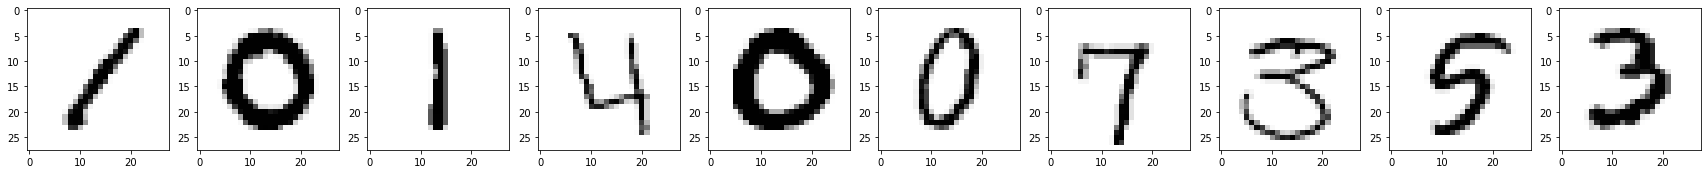

In [8]:
plt.figure(figsize=(30, 15))

n = 10

for i in range(n):
    plt.subplot(1, n, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='Greys')
plt.show()

<a id="sec4"></a>
## 4. Pre-processing

<a id="sec41"></a>
### labels

In [9]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [10]:
y_cat_train = to_categorical(y_train)
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="sec42"></a>
### data normalization

In [11]:
x_train = x_train/255

<a id="sec43"></a>
### data split

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_cat_train, test_size=0.2, random_state=42)

<a id="sec5"></a>
## 5. Define and train model

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 599,402
Trainable params: 599,402
Non-trainable params: 0
__________________________________________________

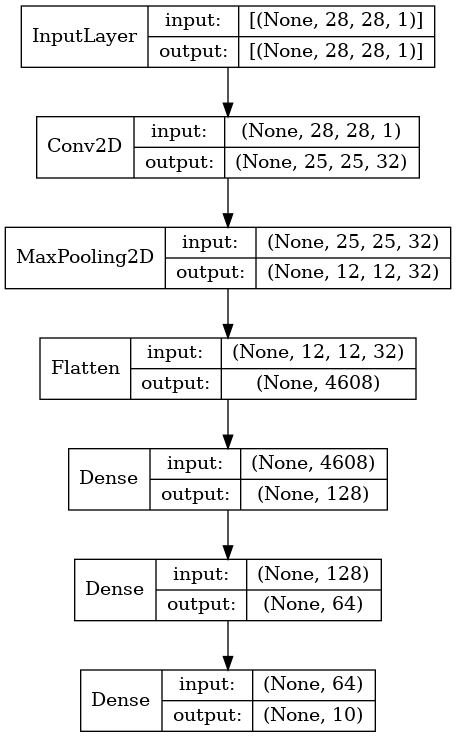

In [15]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [16]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5)

In [17]:
# TRAIN MODEL

model.fit(X_train,
          Y_train, 
          epochs=30, 
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/30
1050/1050 [==============================] - 13s 12ms/step - loss: 0.4145 - accuracy: 0.8776 - val_loss: 0.0846 - val_accuracy: 0.9748
Epoch 2/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0689 - val_accuracy: 0.9781
Epoch 3/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0356 - accuracy: 0.9879 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 4/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 5/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 6/30
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0618 - val_accuracy: 0.9840
Epoch 7/30
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0506 -

<a id="sec6"></a>
## 6. Evaluate model

In [18]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.204339,0.938214,0.084573,0.974762
1,0.064566,0.980149,0.068902,0.978095
2,0.039978,0.986905,0.062127,0.981548
3,0.027453,0.991071,0.055898,0.983095
4,0.020533,0.993482,0.048915,0.985357
5,0.016130,0.994792,0.061831,0.984048
6,0.012761,0.995625,0.050641,0.987976
7,0.009554,0.996994,0.053638,0.986429
8,0.011070,0.996429,0.060060,0.984643
9,0.007163,0.997619,0.063732,0.983810


<AxesSubplot:>

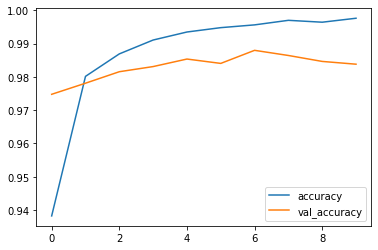

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

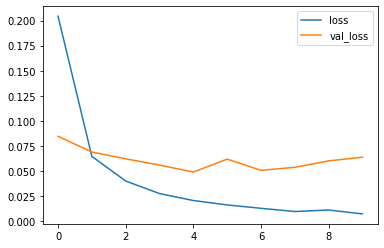

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
pred_val = np.argmax(model.predict(X_val), axis=1)
real_val = np.argmax(Y_val, axis=1)

In [22]:
print(classification_report(real_val, pred_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      1.00      0.99       909
           2       0.99      0.98      0.99       846
           3       0.97      0.99      0.98       937
           4       0.98      0.99      0.98       839
           5       0.99      0.97      0.98       702
           6       0.98      0.99      0.99       785
           7       1.00      0.98      0.99       893
           8       0.97      0.99      0.98       835
           9       0.99      0.96      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [23]:
confusion_matrix(real_val, pred_val)

array([[808,   0,   1,   1,   0,   0,   4,   0,   0,   2],
       [  0, 905,   2,   0,   0,   0,   1,   0,   1,   0],
       [  0,   4, 832,   6,   2,   0,   0,   0,   2,   0],
       [  0,   0,   1, 932,   0,   0,   0,   1,   3,   0],
       [  1,   1,   0,   0, 827,   0,   6,   0,   2,   2],
       [  0,   1,   0,   9,   0, 678,   7,   0,   5,   2],
       [  1,   0,   0,   0,   0,   0, 781,   0,   3,   0],
       [  0,   5,   6,   1,   3,   0,   0, 872,   2,   4],
       [  2,   2,   0,   2,   2,   2,   0,   1, 824,   0],
       [  1,   1,   0,  10,   9,   2,   0,   1,   9, 805]])

<a id="sec7"></a>
## 7. Predict on test data

In [24]:
N_test_samples = x_test.shape[0]

x_test_new = x_test.reshape(N_test_samples, 28, 28, 1)
x_test_new = x_test_new/255

x_test_new.shape

(28000, 28, 28, 1)

In [25]:
predictions = model.predict(x_test_new)

print(predictions.shape)

predictions

(28000, 10)


array([[3.0402652e-14, 2.2842833e-10, 1.0000000e+00, ..., 2.7562152e-12,
        1.4889268e-12, 1.8890942e-14],
       [9.9999988e-01, 2.4127837e-11, 1.3515099e-10, ..., 2.0011095e-09,
        2.8350280e-10, 5.3668630e-09],
       [3.5800235e-10, 1.1004246e-08, 1.7223580e-06, ..., 4.0605626e-09,
        5.3316697e-05, 9.9993038e-01],
       ...,
       [5.2717755e-18, 5.4951302e-13, 1.7723080e-19, ..., 6.2699306e-16,
        5.9572378e-15, 1.3468392e-14],
       [6.8237412e-08, 7.5464868e-07, 2.2939739e-08, ..., 3.3514759e-06,
        1.4840518e-06, 9.9928492e-01],
       [4.3274073e-17, 2.8984337e-12, 1.0000000e+00, ..., 3.1065299e-16,
        2.9216911e-15, 2.7546065e-16]], dtype=float32)

In [26]:
final_pred = np.argmax(predictions, axis=1)

final_pred

array([2, 0, 9, ..., 3, 9, 2])

Predicted value: 5



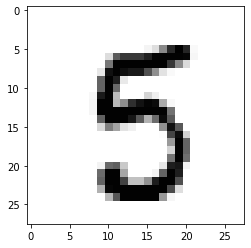

In [27]:
# Visualize some test prediction and corresponding digit 

test_index = 10

plt.imshow(x_test_new[test_index], cmap='Greys')
print(f"Predicted value: {final_pred[test_index]}\n")


<a id="sec71"></a>
### generate submission

In [28]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [29]:
submission_dict = {"ImageId": [i+1 for i in range(28000)],
                   "Label": final_pred}

sub_df = pd.DataFrame(submission_dict)

sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [30]:
sub_df.to_csv("submission.csv", index=False)

<a id="sec8"></a>
## 8. Potential next steps

* explore (mean? histogram? nonzero per class?)
* feature selection (crop and other methods)?
* dimensionality reduction?
* data augmentation?
* cross validation?
* more complex CNN?
* compare to simpler approach (cosine similarity?)